In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/weak_scale_data_16.xlsx')

Mounted at /content/drive


In [2]:
df


,Nodes,Cores,SCALE,graph_generation RMAT non-agl,construction_time Cyclic non-agl,bfs mean_time Cyclic non-agl,bfs harmonic_mean_TEPS Cyclic non-agl,graph_generation Uniform,graph_generation RMAT,construction_time Cyclic,...,bfs harmonic_mean_TEPS SnakeHashRotation,Average load on PE SnakeHashRotation,Variance load on PE SnakeHashRotation,Highest deviation from Average SnakeHashRotation,construction_time SnakeRotationFlipping,bfs mean_time SnakeRotationFlipping,bfs harmonic_mean_TEPS SnakeRotationFlipping,Average load on PE SnakeRotationFlipping,Variance load on PE SnakeRotationFlipping,Highest deviation from Average SnakeRotationFlipping
0,1,16,20,4.033022,0.842080,0.093779,178902000,0.092479,0.370699,0.779554,...,50200200,2.097007e+06,1.068729e+12,2.485071e+06,0.428570,0.295752,56727400,2.097007e+06,4.792505e+11,1.918265e+06
1,2,32,21,4.453967,0.902600,0.138169,242851000,0.092899,0.389418,1.425038,...,74303200,2.097063e+06,1.322683e+12,3.265669e+06,0.596321,0.401915,83486400,2.097063e+06,6.439374e+11,2.648262e+06
2,4,64,22,4.599828,0.858979,0.143207,468614000,0.093513,0.406463,1.989140,...,103275000,2.097095e+06,1.587143e+12,4.150770e+06,0.617450,0.606810,110593000,2.097095e+06,8.222463e+11,3.502102e+06
3,8,128,23,4.748868,0.826418,0.154353,869551000,0.093811,0.423523,2.988673,...,216582000,2.097115e+06,1.861023e+12,5.153526e+06,0.669054,0.546512,245590000,2.097115e+06,1.011537e+12,4.495371e+06
4,16,256,24,4.896365,0.810411,0.166165,1615480000,0.094576,0.456120,4.300059,...,460586000,2.097130e+06,2.148531e+12,6.307203e+06,0.749962,0.503614,506318000,2.097130e+06,1.210651e+12,5.665925e+06
5,32,512,25,5.045617,0.887686,0.196249,2735670000,0.094790,0.472178,6.734764,...,586070000,2.097139e+06,2.449847e+12,7.626344e+06,0.843440,0.789436,680069000,2.097139e+06,1.420587e+12,7.040639e+06


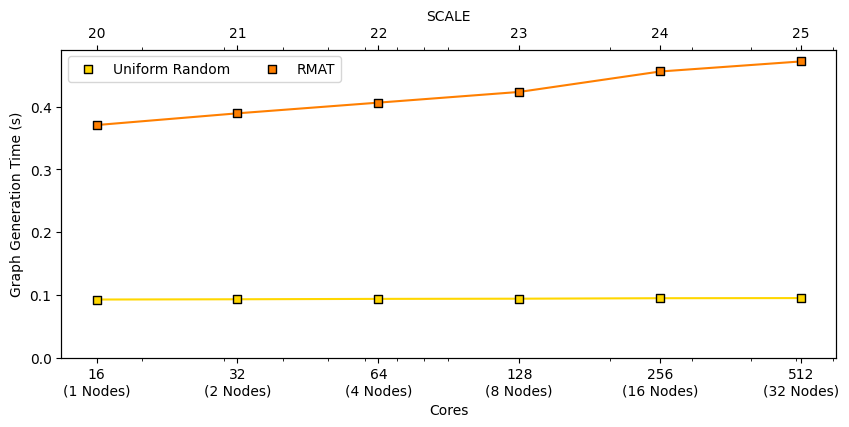

In [5]:
markers = ['o', 's']
colors = ['#FFD700', '#FF7F00',]
plt.figure(figsize=(10,4))
ax = plt.subplot(1, 1, 1)
ax.set_xscale('log')
i = 0

for index, row in df.iterrows():
    plt.scatter(row['Cores'], row['graph_generation Uniform'],  marker = markers[1], edgecolors = 'black', c = colors[0],zorder=2)
    plt.scatter(row['Cores'], row['graph_generation RMAT'],  marker = markers[1], edgecolors = 'black', c = colors[1],zorder=2)
plt.plot(df['Cores'], df['graph_generation Uniform'], c = colors[0],zorder=1)
plt.plot(df['Cores'], df['graph_generation RMAT'], c = colors[1],zorder=1)
ax.set_xticks(list(df['Cores']))
ax.set_xticklabels(['16\n(1 Nodes)', '32\n(2 Nodes)', '64\n(4 Nodes)', '128\n(8 Nodes)', '256\n(16 Nodes)', '512\n(32 Nodes)',])
ax.set_xlabel(r"Cores")
plt.ylabel('Graph Generation Time (s)')

# Setting the y-axis limit to include 0
ax.set_ylim(bottom=0)

ax3 = ax.twiny()
ax3.set_xscale('log')
ax3.set_xlim(ax.get_xlim())
ax3.set_xticks(list(df['Cores']))
ax3.set_xticklabels(list(df['SCALE']))
ax3.set_xlabel(r"SCALE")

i = 0
metrics = ['Uniform Random', 'RMAT']
for metric in metrics:
    plt.scatter([], [], c=colors[i], marker=markers[1], edgecolors='black', label=str(metric))
    plt.legend(ncol=2, scatterpoints=1, labelspacing=1, loc='upper left')
    i += 1
plt.savefig("PACE_strong_scaling")

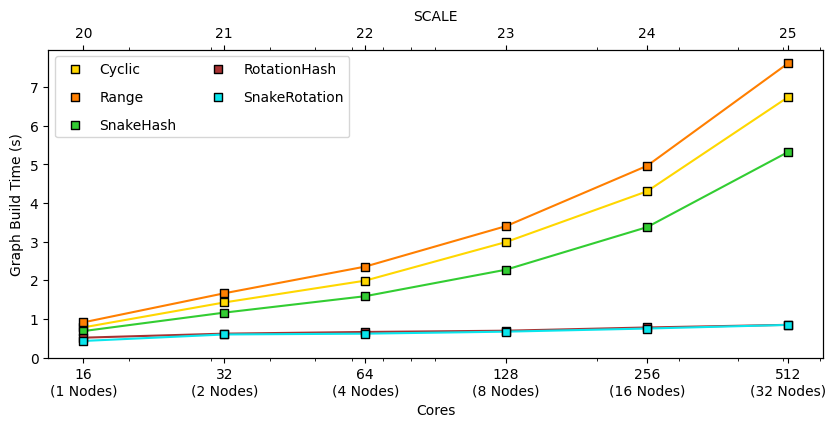

In [6]:
markers = ['o', 's']
colors = ['#FFD700', '#FF7F00', '#32CD32', '#a83232', '#09e6ed', '#080303',]
plt.figure(figsize=(10,4))
ax = plt.subplot(1, 1, 1)
ax.set_xscale('log')
i = 0

for index, row in df.iterrows():
    plt.scatter(row['Cores'], row['construction_time Cyclic'],  marker = markers[1], edgecolors = 'black', c = colors[0],zorder=2)
    plt.scatter(row['Cores'], row['construction_time Range'],  marker = markers[1], edgecolors = 'black', c = colors[1],zorder=2)
    plt.scatter(row['Cores'], row['construction_time SnakeHashFlipping'],  marker = markers[1], edgecolors = 'black', c = colors[2],zorder=2)
    plt.scatter(row['Cores'], row['construction_time SnakeHashRotation'],  marker = markers[1], edgecolors = 'black', c = colors[3],zorder=2)
    plt.scatter(row['Cores'], row['construction_time SnakeRotationFlipping'],  marker = markers[1], edgecolors = 'black', c = colors[4],zorder=2)
plt.plot(df['Cores'], df['construction_time Cyclic'], c = colors[0],zorder=1)
plt.plot(df['Cores'], df['construction_time Range'], c = colors[1],zorder=1)
plt.plot(df['Cores'], df['construction_time SnakeHashFlipping'], c = colors[2],zorder=1)
plt.plot(df['Cores'], df['construction_time SnakeHashRotation'], c = colors[3],zorder=1)
plt.plot(df['Cores'], df['construction_time SnakeRotationFlipping'], c = colors[4],zorder=1)
ax.set_xticks(list(df['Cores']))
ax.set_xticklabels(['16\n(1 Nodes)', '32\n(2 Nodes)', '64\n(4 Nodes)', '128\n(8 Nodes)', '256\n(16 Nodes)', '512\n(32 Nodes)',])
ax.set_xlabel(r"Cores")
plt.ylabel('Graph Build Time (s)')

# Setting the y-axis limit to include 0
ax.set_ylim(bottom=0)

ax3 = ax.twiny()
ax3.set_xscale('log')
ax3.set_xlim(ax.get_xlim())
ax3.set_xticks(list(df['Cores']))
ax3.set_xticklabels(list(df['SCALE']))
ax3.set_xlabel(r"SCALE")

i = 0
metrics = ['Cyclic', 'Range', 'SnakeHash', 'RotationHash', 'SnakeRotation',]
for metric in metrics:
    plt.scatter([], [], c=colors[i], marker=markers[1], edgecolors='black', label=str(metric))
    plt.legend(ncol=2, scatterpoints=1, labelspacing=1, loc='upper left')
    i += 1
plt.savefig("PACE_strong_scaling")

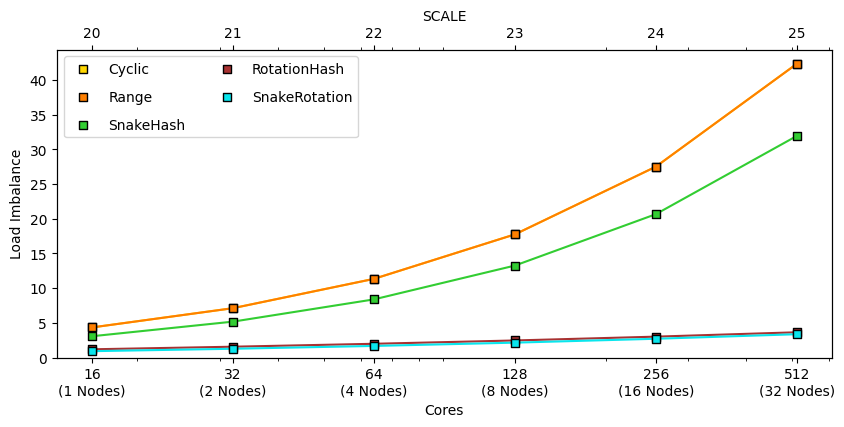

In [8]:
markers = ['o', 's']
colors = ['#FFD700', '#FF7F00', '#32CD32', '#a83232', '#09e6ed', '#080303',]
plt.figure(figsize=(10,4))
ax = plt.subplot(1, 1, 1)
ax.set_xscale('log')
i = 0

df['(Highest deviation from Average)/(Average Load) Cyclic'] = df['Highest deviation from Average Cyclic']/df['Average load on PE Cyclic']
df['(Highest deviation from Average)/(Average Load) Range'] = df['Highest deviation from Average Range']/df['Average load on PE Range']
df['(Highest deviation from Average)/(Average Load) SnakeHashFlipping'] = df['Highest deviation from Average SnakeHashFlipping']/df['Average load on PE SnakeHashFlipping']
df['(Highest deviation from Average)/(Average Load) SnakeHashRotation'] = df['Highest deviation from Average SnakeHashRotation']/df['Average load on PE SnakeHashRotation']
df['(Highest deviation from Average)/(Average Load) SnakeRotationFlipping'] = df['Highest deviation from Average SnakeRotationFlipping']/df['Average load on PE SnakeRotationFlipping']


for index, row in df.iterrows():
    plt.scatter(row['Cores'], row['(Highest deviation from Average)/(Average Load) Cyclic'],  marker = markers[1], edgecolors = 'black', c = colors[0],zorder=2)
    plt.scatter(row['Cores'], row['(Highest deviation from Average)/(Average Load) Range'],  marker = markers[1], edgecolors = 'black', c = colors[1],zorder=2)
    plt.scatter(row['Cores'], row['(Highest deviation from Average)/(Average Load) SnakeHashFlipping'],  marker = markers[1], edgecolors = 'black', c = colors[2],zorder=2)
    plt.scatter(row['Cores'], row['(Highest deviation from Average)/(Average Load) SnakeHashRotation'],  marker = markers[1], edgecolors = 'black', c = colors[3],zorder=2)
    plt.scatter(row['Cores'], row['(Highest deviation from Average)/(Average Load) SnakeRotationFlipping'],  marker = markers[1], edgecolors = 'black', c = colors[4],zorder=2)
plt.plot(df['Cores'], df['(Highest deviation from Average)/(Average Load) Cyclic'], c = colors[0],zorder=1)
plt.plot(df['Cores'], df['(Highest deviation from Average)/(Average Load) Range'], c = colors[1],zorder=1)
plt.plot(df['Cores'], df['(Highest deviation from Average)/(Average Load) SnakeHashFlipping'], c = colors[2],zorder=1)
plt.plot(df['Cores'], df['(Highest deviation from Average)/(Average Load) SnakeHashRotation'], c = colors[3],zorder=1)
plt.plot(df['Cores'], df['(Highest deviation from Average)/(Average Load) SnakeRotationFlipping'], c = colors[4],zorder=1)
ax.set_xticks(list(df['Cores']))
ax.set_xticklabels(['16\n(1 Nodes)', '32\n(2 Nodes)', '64\n(4 Nodes)', '128\n(8 Nodes)', '256\n(16 Nodes)', '512\n(32 Nodes)',])
ax.set_xlabel(r"Cores")
plt.ylabel('Load Imbalance')

# Setting the y-axis limit to include 0
ax.set_ylim(bottom=0)

ax3 = ax.twiny()
ax3.set_xscale('log')
ax3.set_xlim(ax.get_xlim())
ax3.set_xticks(list(df['Cores']))
ax3.set_xticklabels(list(df['SCALE']))
ax3.set_xlabel(r"SCALE")

i = 0
metrics = ['Cyclic', 'Range', 'SnakeHash', 'RotationHash', 'SnakeRotation',]
for metric in metrics:
    plt.scatter([], [], c=colors[i], marker=markers[1], edgecolors='black', label=str(metric))
    plt.legend(ncol=2, scatterpoints=1, labelspacing=1, loc='upper left')
    i += 1
plt.savefig("PACE_strong_scaling")

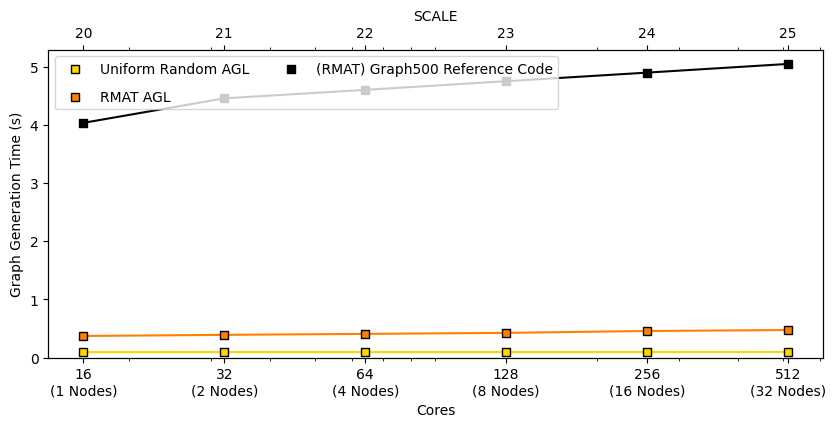

In [9]:
markers = ['o', 's']
colors = ['#FFD700', '#FF7F00', '#080303',]
plt.figure(figsize=(10,4))
ax = plt.subplot(1, 1, 1)
ax.set_xscale('log')
i = 0

for index, row in df.iterrows():
    plt.scatter(row['Cores'], row['graph_generation Uniform'],  marker = markers[1], edgecolors = 'black', c = colors[0],zorder=2)
    plt.scatter(row['Cores'], row['graph_generation RMAT'],  marker = markers[1], edgecolors = 'black', c = colors[1],zorder=2)
    plt.scatter(row['Cores'], row['graph_generation RMAT non-agl'],  marker = markers[1], edgecolors = 'black', c = colors[2],zorder=2)
plt.plot(df['Cores'], df['graph_generation Uniform'], c = colors[0],zorder=1)
plt.plot(df['Cores'], df['graph_generation RMAT'], c = colors[1],zorder=1)
plt.plot(df['Cores'], df['graph_generation RMAT non-agl'], c = colors[2],zorder=1)
ax.set_xticks(list(df['Cores']))
ax.set_xticklabels(['16\n(1 Nodes)', '32\n(2 Nodes)', '64\n(4 Nodes)', '128\n(8 Nodes)', '256\n(16 Nodes)', '512\n(32 Nodes)',])
ax.set_xlabel(r"Cores")
plt.ylabel('Graph Generation Time (s)')

# Setting the y-axis limit to include 0
ax.set_ylim(bottom=0)

ax3 = ax.twiny()
ax3.set_xscale('log')
ax3.set_xlim(ax.get_xlim())
ax3.set_xticks(list(df['Cores']))
ax3.set_xticklabels(list(df['SCALE']))
ax3.set_xlabel(r"SCALE")

i = 0
metrics = ['Uniform Random AGL', 'RMAT AGL', '(RMAT) Graph500 Reference Code']
for metric in metrics:
    plt.scatter([], [], c=colors[i], marker=markers[1], edgecolors='black', label=str(metric))
    plt.legend(ncol=2, scatterpoints=1, labelspacing=1, loc='upper left')
    i += 1
plt.savefig("PACE_strong_scaling")

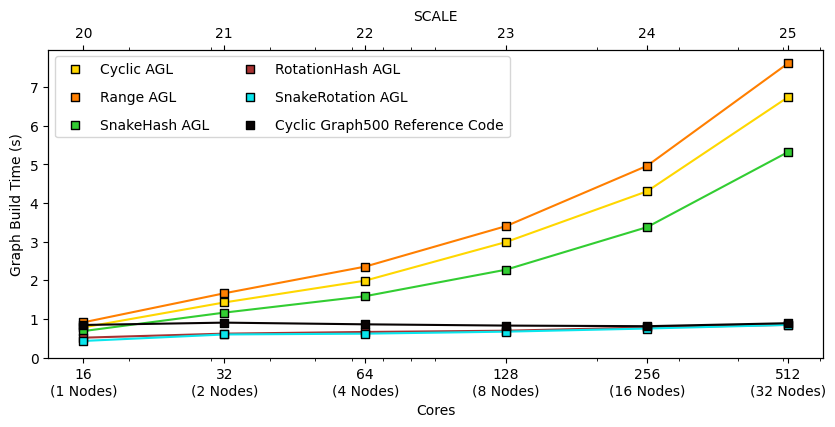

In [11]:
markers = ['o', 's']
colors = ['#FFD700', '#FF7F00', '#32CD32', '#a83232', '#09e6ed', '#080303',]
plt.figure(figsize=(10,4))
ax = plt.subplot(1, 1, 1)
ax.set_xscale('log')
i = 0

for index, row in df.iterrows():
    plt.scatter(row['Cores'], row['construction_time Cyclic'],  marker = markers[1], edgecolors = 'black', c = colors[0],zorder=2)
    plt.scatter(row['Cores'], row['construction_time Range'],  marker = markers[1], edgecolors = 'black', c = colors[1],zorder=2)
    plt.scatter(row['Cores'], row['construction_time SnakeHashFlipping'],  marker = markers[1], edgecolors = 'black', c = colors[2],zorder=2)
    plt.scatter(row['Cores'], row['construction_time SnakeHashRotation'],  marker = markers[1], edgecolors = 'black', c = colors[3],zorder=2)
    plt.scatter(row['Cores'], row['construction_time SnakeRotationFlipping'],  marker = markers[1], edgecolors = 'black', c = colors[4],zorder=2)
    plt.scatter(row['Cores'], row['construction_time Cyclic non-agl'],  marker = markers[1], edgecolors = 'black', c = colors[5],zorder=2)
plt.plot(df['Cores'], df['construction_time Cyclic'], c = colors[0],zorder=1)
plt.plot(df['Cores'], df['construction_time Range'], c = colors[1],zorder=1)
plt.plot(df['Cores'], df['construction_time SnakeHashFlipping'], c = colors[2],zorder=1)
plt.plot(df['Cores'], df['construction_time SnakeHashRotation'], c = colors[3],zorder=1)
plt.plot(df['Cores'], df['construction_time SnakeRotationFlipping'], c = colors[4],zorder=1)
plt.plot(df['Cores'], df['construction_time Cyclic non-agl'], c = colors[5],zorder=1)
ax.set_xticks(list(df['Cores']))
ax.set_xticklabels(['16\n(1 Nodes)', '32\n(2 Nodes)', '64\n(4 Nodes)', '128\n(8 Nodes)', '256\n(16 Nodes)', '512\n(32 Nodes)',])
ax.set_xlabel(r"Cores")
plt.ylabel('Graph Build Time (s)')

# Setting the y-axis limit to include 0
ax.set_ylim(bottom=0)

ax3 = ax.twiny()
ax3.set_xscale('log')
ax3.set_xlim(ax.get_xlim())
ax3.set_xticks(list(df['Cores']))
ax3.set_xticklabels(list(df['SCALE']))
ax3.set_xlabel(r"SCALE")

i = 0
metrics = ['Cyclic AGL', 'Range AGL', 'SnakeHash AGL', 'RotationHash AGL', 'SnakeRotation AGL', 'Cyclic Graph500 Reference Code']
for metric in metrics:
    plt.scatter([], [], c=colors[i], marker=markers[1], edgecolors='black', label=str(metric))
    plt.legend(ncol=2, scatterpoints=1, labelspacing=1, loc='upper left')
    i += 1
plt.savefig("PACE_strong_scaling")

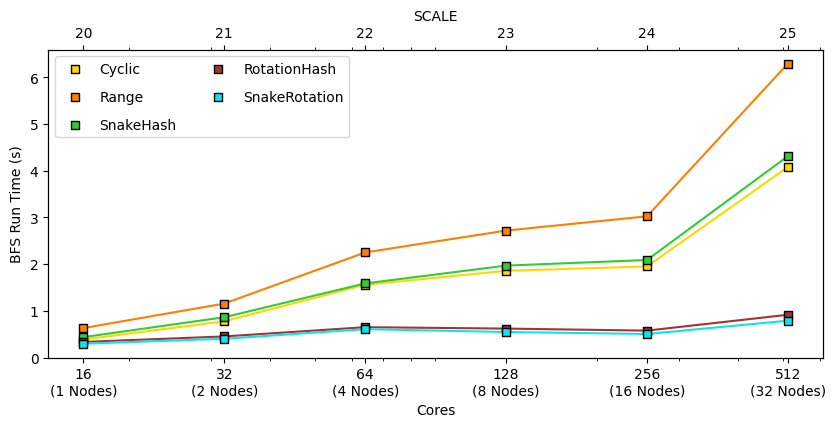

In [12]:
markers = ['o', 's']
colors = ['#FFD700', '#FF7F00', '#32CD32', '#a83232', '#09e6ed', '#080303',]
plt.figure(figsize=(10,4))
ax = plt.subplot(1, 1, 1)
ax.set_xscale('log')
i = 0

for index, row in df.iterrows():
    plt.scatter(row['Cores'], row['bfs mean_time Cyclic'],  marker = markers[1], edgecolors = 'black', c = colors[0],zorder=2)
    plt.scatter(row['Cores'], row['bfs mean_time Range'],  marker = markers[1], edgecolors = 'black', c = colors[1],zorder=2)
    plt.scatter(row['Cores'], row['bfs mean_time SnakeHashFlipping'],  marker = markers[1], edgecolors = 'black', c = colors[2],zorder=2)
    plt.scatter(row['Cores'], row['bfs mean_time SnakeHashRotation'],  marker = markers[1], edgecolors = 'black', c = colors[3],zorder=2)
    plt.scatter(row['Cores'], row['bfs mean_time SnakeRotationFlipping'],  marker = markers[1], edgecolors = 'black', c = colors[4],zorder=2)
plt.plot(df['Cores'], df['bfs mean_time Cyclic'], c = colors[0],zorder=1)
plt.plot(df['Cores'], df['bfs mean_time Range'], c = colors[1],zorder=1)
plt.plot(df['Cores'], df['bfs mean_time SnakeHashFlipping'], c = colors[2],zorder=1)
plt.plot(df['Cores'], df['bfs mean_time SnakeHashRotation'], c = colors[3],zorder=1)
plt.plot(df['Cores'], df['bfs mean_time SnakeRotationFlipping'], c = colors[4],zorder=1)
ax.set_xticks(list(df['Cores']))
ax.set_xticklabels(['16\n(1 Nodes)', '32\n(2 Nodes)', '64\n(4 Nodes)', '128\n(8 Nodes)', '256\n(16 Nodes)', '512\n(32 Nodes)',])
ax.set_xlabel(r"Cores")
plt.ylabel('BFS Run Time (s)')

# Setting the y-axis limit to include 0
ax.set_ylim(bottom=0)

ax3 = ax.twiny()
ax3.set_xscale('log')
ax3.set_xlim(ax.get_xlim())
ax3.set_xticks(list(df['Cores']))
ax3.set_xticklabels(list(df['SCALE']))
ax3.set_xlabel(r"SCALE")

i = 0
metrics = ['Cyclic', 'Range', 'SnakeHash', 'RotationHash', 'SnakeRotation',]
for metric in metrics:
    plt.scatter([], [], c=colors[i], marker=markers[1], edgecolors='black', label=str(metric))
    plt.legend(ncol=2, scatterpoints=1, labelspacing=1, loc='upper left')
    i += 1
plt.savefig("PACE_strong_scaling")

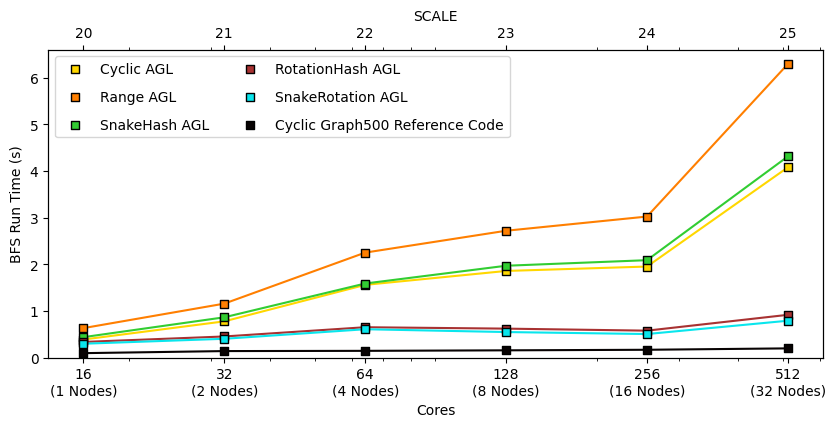

In [13]:
markers = ['o', 's']
colors = ['#FFD700', '#FF7F00', '#32CD32', '#a83232', '#09e6ed', '#080303',]
plt.figure(figsize=(10,4))
ax = plt.subplot(1, 1, 1)
ax.set_xscale('log')
i = 0

for index, row in df.iterrows():
    plt.scatter(row['Cores'], row['bfs mean_time Cyclic'],  marker = markers[1], edgecolors = 'black', c = colors[0],zorder=2)
    plt.scatter(row['Cores'], row['bfs mean_time Range'],  marker = markers[1], edgecolors = 'black', c = colors[1],zorder=2)
    plt.scatter(row['Cores'], row['bfs mean_time SnakeHashFlipping'],  marker = markers[1], edgecolors = 'black', c = colors[2],zorder=2)
    plt.scatter(row['Cores'], row['bfs mean_time SnakeHashRotation'],  marker = markers[1], edgecolors = 'black', c = colors[3],zorder=2)
    plt.scatter(row['Cores'], row['bfs mean_time SnakeRotationFlipping'],  marker = markers[1], edgecolors = 'black', c = colors[4],zorder=2)
    plt.scatter(row['Cores'], row['bfs mean_time Cyclic non-agl'],  marker = markers[1], edgecolors = 'black', c = colors[5],zorder=2)
plt.plot(df['Cores'], df['bfs mean_time Cyclic'], c = colors[0],zorder=1)
plt.plot(df['Cores'], df['bfs mean_time Range'], c = colors[1],zorder=1)
plt.plot(df['Cores'], df['bfs mean_time SnakeHashFlipping'], c = colors[2],zorder=1)
plt.plot(df['Cores'], df['bfs mean_time SnakeHashRotation'], c = colors[3],zorder=1)
plt.plot(df['Cores'], df['bfs mean_time SnakeRotationFlipping'], c = colors[4],zorder=1)
plt.plot(df['Cores'], df['bfs mean_time Cyclic non-agl'], c = colors[5],zorder=1)
ax.set_xticks(list(df['Cores']))
ax.set_xticklabels(['16\n(1 Nodes)', '32\n(2 Nodes)', '64\n(4 Nodes)', '128\n(8 Nodes)', '256\n(16 Nodes)', '512\n(32 Nodes)',])
ax.set_xlabel(r"Cores")
plt.ylabel('BFS Run Time (s)')

# Setting the y-axis limit to include 0
ax.set_ylim(bottom=0)

ax3 = ax.twiny()
ax3.set_xscale('log')
ax3.set_xlim(ax.get_xlim())
ax3.set_xticks(list(df['Cores']))
ax3.set_xticklabels(list(df['SCALE']))
ax3.set_xlabel(r"SCALE")

i = 0
metrics = ['Cyclic AGL', 'Range AGL', 'SnakeHash AGL', 'RotationHash AGL', 'SnakeRotation AGL', 'Cyclic Graph500 Reference Code']
for metric in metrics:
    plt.scatter([], [], c=colors[i], marker=markers[1], edgecolors='black', label=str(metric))
    plt.legend(ncol=2, scatterpoints=1, labelspacing=1, loc='upper left')
    i += 1
plt.savefig("PACE_strong_scaling")